In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, njit
from numba.types import pyobject
import numba
import time
import jit_functions as jf

In [11]:
log_gammas = np.logspace(-3,3, 5)
gammas = np.array([float(10**(2*p)) for p in range(-3,3)])
big_logs = np.logspace(-3,1.699, 50)

# Creating my OBABO class element

# Mapping the unimodal

In [12]:
# defining functions for potential and force
@njit()
def U(x):
    return x**2/2

@njit()
def force(q):
    F = q
    return -F

obabo_step = jf.make_obabo(force)
OBABO = jf.Scheme(obabo_step, force, U)

In [13]:
baoab_step = jf.make_baoab(force)
BAOAB = jf.Scheme(baoab_step, force, U)

# Graphing the results of the simulation

Time Elapsed: 56.887155055999756


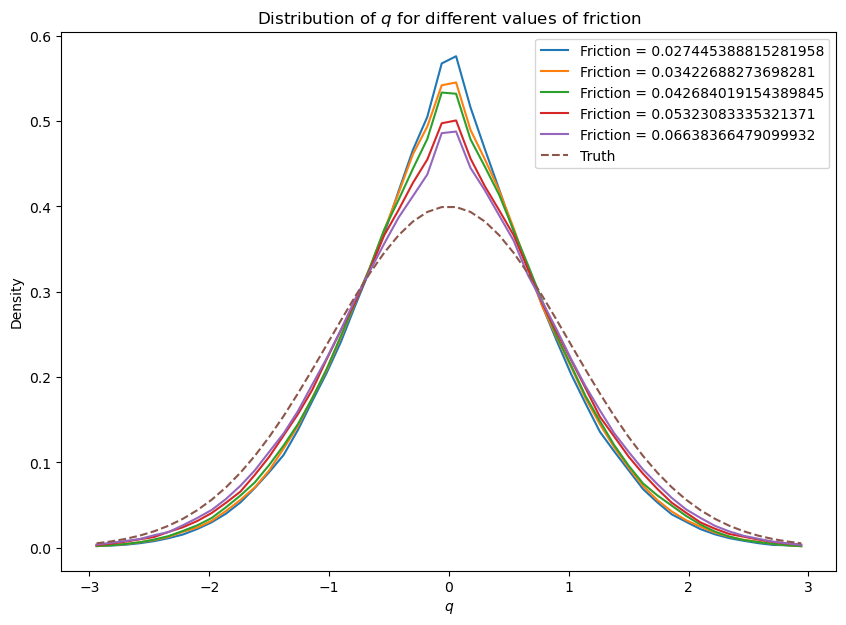

In [14]:
# running 1000 simulations, each taking 100000 steps of size 0.01
start_time =time.time()
BAOAB.friction_graph(10000, 0.01, 1000, big_logs[15:20])
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

Gamma = 0.009098705154177404
Iters = 110000
Gamma = 0.011346908453962521
Iters = 110000
Gamma = 0.014150621355555537
Iters = 110000
Gamma = 0.017647104985532645
Iters = 110000
Gamma = 0.022007536386248326
Iters = 110000
Gamma = 0.027445388815281958
Iters = 110000
Gamma = 0.03422688273698281
Iters = 110000
Gamma = 0.042684019154389845
Iters = 110000
Gamma = 0.05323083335321371
Iters = 110000
Gamma = 0.06638366479099932
Iters = 110000
Gamma = 0.08278643548265453
Iters = 110000
Gamma = 0.10324217443404794
Iters = 110000
Gamma = 0.12875233146260612
Iters = 110000
Gamma = 0.1605658050881757
Iters = 76050
Gamma = 0.2002400847483044
Iters = 73965
Gamma = 0.24971750067200893
Iters = 62068
Gamma = 0.3114203143704111
Iters = 52180
Gamma = 0.3883693050810541
Iters = 42041
Gamma = 0.48433165779204407
Iters = 39608
Gamma = 0.6040053929870508
Iters = 34134
Gamma = 0.753249367222004
Iters = 34825
Gamma = 0.9393701046515556
Iters = 31175
Gamma = 1.171479501891172
Iters = 35583
Gamma = 1.46094091834042

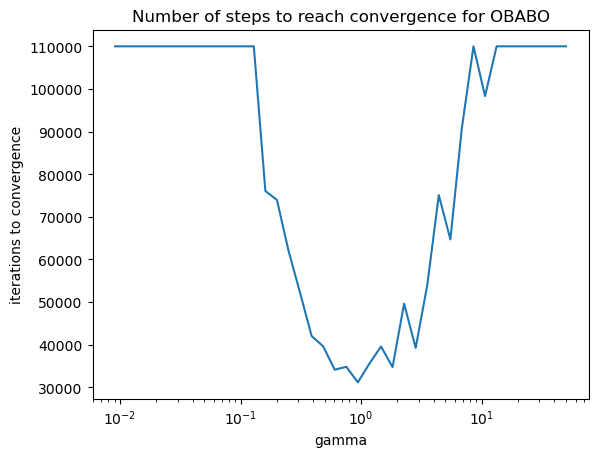

In [5]:
start_time =time.time()
BAOAB.avg_convergence_time_graph("Number of steps to reach convergence for OBABO",0.1, jf.square, 1, 0.01, big_logs[10:],q_init = np.zeros(100), p_init =np.zeros(100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

## Bimodal

In [8]:
# defining functions for potential and force
@njit()
def U_2(x):
    return (x-0.9)**4/8 - (x-1)**2/1.2

@njit()
def force_2(x):
    F = (x-0.9)**3/2 - 2*(x-1)/1.2
    return -F

baoab_step = jf.make_baoab(force_2)
BAOAB_2 = jf.Scheme(baoab_step, force_2, U_2)

Time Elapsed: 26.667885780334473


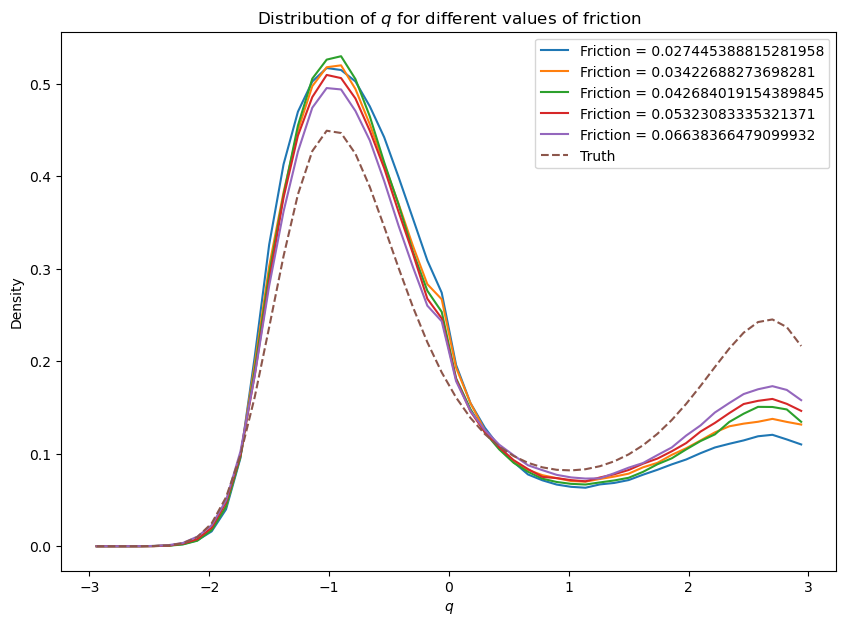

In [7]:
# running 1000 simulations, each taking 100000 steps of size 0.01
start_time =time.time()
BAOAB_2.friction_graph(10000, 0.01, 1000, big_logs[15:20])
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [8]:
true_2 = 36.7893/13.0606
true_2

2.816815460239192

Gamma = 0.027445388815281958
Iters = 260000
Gamma = 0.03422688273698281
Iters = 260000
Gamma = 0.042684019154389845
Iters = 260000
Gamma = 0.05323083335321371
Iters = 260000
Gamma = 0.06638366479099932
Iters = 260000
Gamma = 0.08278643548265453
Iters = 260000
Gamma = 0.10324217443404794
Iters = 259999
Gamma = 0.12875233146260612
Iters = 211730
Gamma = 0.1605658050881757
Iters = 160480
Gamma = 0.2002400847483044
Iters = 148503
Gamma = 0.24971750067200893
Iters = 135033
Gamma = 0.3114203143704111
Iters = 139425
Gamma = 0.3883693050810541
Iters = 123943
Gamma = 0.48433165779204407
Iters = 124674
Gamma = 0.6040053929870508
Iters = 104059
Gamma = 0.753249367222004
Iters = 139588
Gamma = 0.9393701046515556
Iters = 120323
Gamma = 1.171479501891172
Iters = 161835
Gamma = 1.4609409183404287
Iters = 165311
Gamma = 1.8219254911723193
Iters = 150862
Gamma = 2.272105910452707
Iters = 197793
Gamma = 2.83352161947761
Iters = 260000
Gamma = 3.5336577978652834
Iters = 260000
Gamma = 4.406790951083763
I

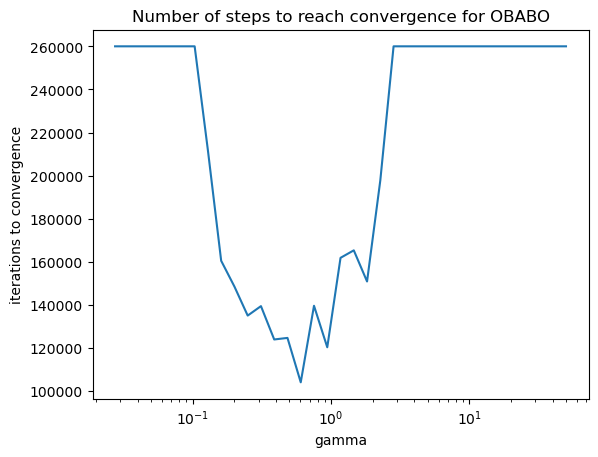

In [10]:
start_time =time.time()
BAOAB_2.avg_convergence_time_graph("Number of steps to reach convergence for OBABO",0.25, jf.square, true_2, 0.01, big_logs[15:],q_init = np.random.normal(size =1000), np.random.normal(size =1000))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

KeyboardInterrupt: 

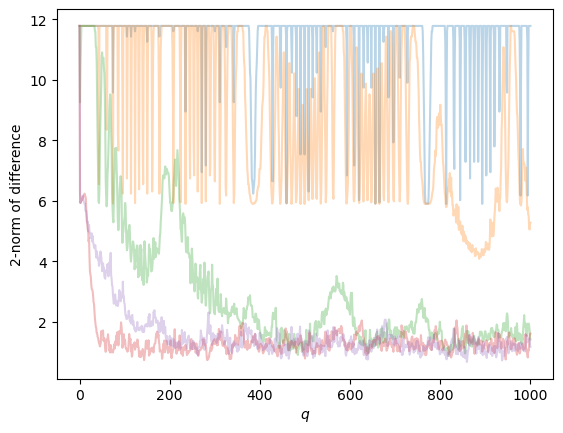

In [13]:
start_time =time.time()
OBABO_2.convergence_graph(1000, 0.01, 100, gammas)
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [ ]:
start_time =time.time()
OBABO.expectation_graph(U,10000, 0.01, 100, gammas, q_init = np.random.normal(size =100), p_init = np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [ ]:
start_time =time.time()
OBABO.convergence_time_graph(1/3, jf.nothing, 0, 0.01, log_gammas,q_init = np.random.normal(size =100), p_init =np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

Gamma = 0.001
Gamma = 0.03162277660168379


In [ ]:
start_time =time.time()
OBABO.convergence_graph(1/10, jf.nothing, 0, 0.01, log_gammas)
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [ ]:
#OBABO.convergence_time_graph(1/10, square, 1.041797296487154, 0.01, lingammas,q_init = np.random.normal(size =1000), p_init =np.random.normal(size = 1000))

In [ ]:
start_time =time.time()
OBABO.expectation_graph(jf.square,10000, 0.01, 1, gammas, q_init = np.random.normal(size =100), p_init =np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [ ]:
start_time =time.time()
OBABO.expectation_graph(jf.nothing,10000, 0.01, 100, gammas, q_init = np.random.normal(size =100), p_init = np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

# A new potential
$U(x) = \log{( e^{2(x-1)^2} + e^{2(x+1)^2} + e^{-(x-3)^2} + e^{(x+3)^2})}$

In [3]:
# defining the method
@jit(nopython=True)
def potential(x):
    return -np.log( np.exp(-2*(x-1)**2) + np.exp(-2*(x+1)**2) + np.exp(-2*(x+3)**2) + np.exp(-2*(x-3)**2) )

@jit(nopython=True)
def force_2(x):
    r = -4*(x-1)*np.exp(-2*(x-1)**2)  -4*(x+1)*np.exp(-2*(x+1)**2)  -4*(x+3)*np.exp(-2*(x+3)**2) -4*(x-3)*np.exp(-2*(x-3)**2)
    F = r/(np.exp(-2*(x-1)**2) + np.exp(-2*(x+1)**2) + np.exp(-2*(x+3)**2) + np.exp(-2*(x-3)**2))
    return F

obabo_step_2 = jf.make_obabo(force_2)
OBABO_2 = jf.Scheme(obabo_step_2, force_2, potential)

Time Elapsed: 62.08657622337341


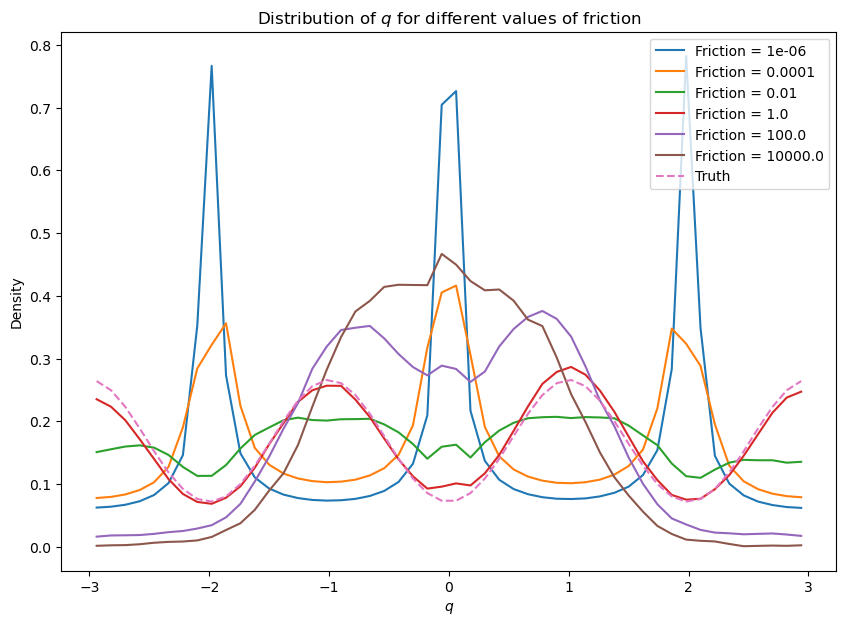

In [4]:
start_time =time.time()
OBABO_2.friction_graph(10000, 0.01, 1000, gammas)
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [ ]:
start_time =time.time()
OBABO_2.expectation_graph(potential,10000, 0.01, 1000, gammas, q_init =np.random.normal(size = 100), p_init = np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [ ]:
print(f"Time Elapsed: {end_time - start_time}")
start_time = time.time()
OBABO_2.expectation_graph(jf.square, 1000, 0.01, 1000, gammas)
end_time = time.time()
print(f"Time Elapsed: {end_time - start_time}")

Gamma = 0.001
Gamma = 0.03162277660168379
Gamma = 1.0
Gamma = 31.622776601683793
Gamma = 1000.0
Time Elapsed: 184.0559904575348


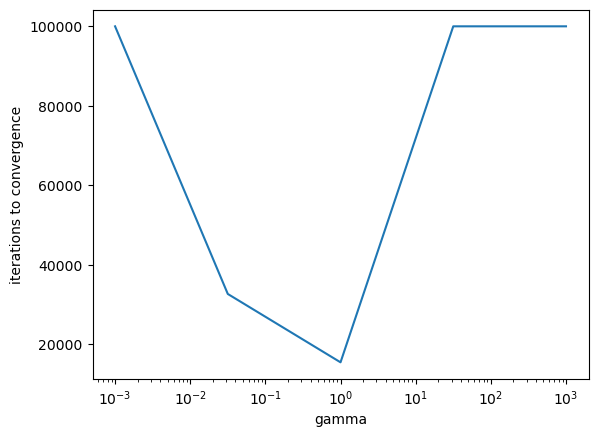

In [9]:
start_time =time.time()
OBABO.convergence_time_graph("Convergence for OBABO",1/4, jf.nothing, 0, 0.01, log_gammas,q_init = np.ones(100), p_init =np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

# Assymmetrical Potentials

In [15]:
@jit(nopython=True)
def potential_3(x):
    return (x-0.9)**4/8 - (x-1)**2/1.2

@jit(nopython=True)
def force_3(x):
    F = -(x-0.9)**3/4 + (x-1)*2/1.2
    return F

In [16]:
obabo_step_3 = jf.make_obabo(force_3)

In [17]:
OBABO_3 = jf.Scheme(obabo_step_3, force_3, potential_3)

Time Elapsed: 73.84609746932983


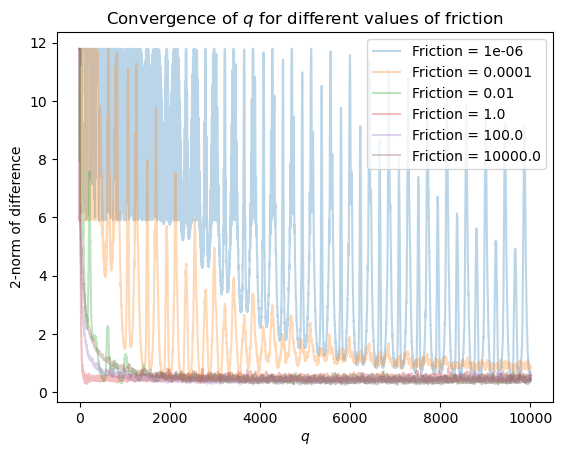

In [6]:
start_time =time.time()
OBABO_3.convergence_graph(1000, 0.01, 1000, gammas)
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [3]:
0start_time =time.time()
OBABO_3.friction_graph(10000, 0.01, 1000, gammas)
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

SyntaxError: invalid decimal literal (2174364446.py, line 1)

In [ ]:
start_time =time.time()
OBABO_3.avg_convergence_time_graph('obabo3',0.15, jf.nothing, 0, 0.01, big_logs[10:40],q_init = np.random.normal(size =1000), p_init =np.random.normal(size = 1000))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

Gamma = 0.009098705154177404


# 4 mode asymmetrical

In [3]:
@jit(nopython=True)
def potential_4(x):
    return -np.log( np.exp(-2*(x-1)**2) + 2*np.exp(-3*(x+1.1)**2) + 1.5*np.exp(-(x+3)**2) + np.exp(-(x-3)**2) )

@jit(nopython=True)
def force_4(x):
    r = -4*(x-1)*np.exp(-2*(x-1)**2)  -2*6*(x+1.1)*np.exp(-3*(x+1.1)**2)  -1.5*2*(x+3)*np.exp(-(x+3)**2) -2*(x-3)*np.exp(-(x-3)**2)
    F = r/(np.exp(-2*(x-1)**2) + 2*np.exp(-3*(x+1.1)**2) + 1.5*np.exp(-(x+3)**2) + np.exp(-(x-3)**2))
    return F

obabo_step_4 = jf.make_obabo(force_4)
OBABO_4 = jf.Scheme(obabo_step_4, force_4, potential_4)

baoab_step_4 = jf.make_baoab(force_4)
BAOAB_4 = jf.Scheme(baoab_step_4, force_4, potential_4)

Time Elapsed: 56.68336820602417


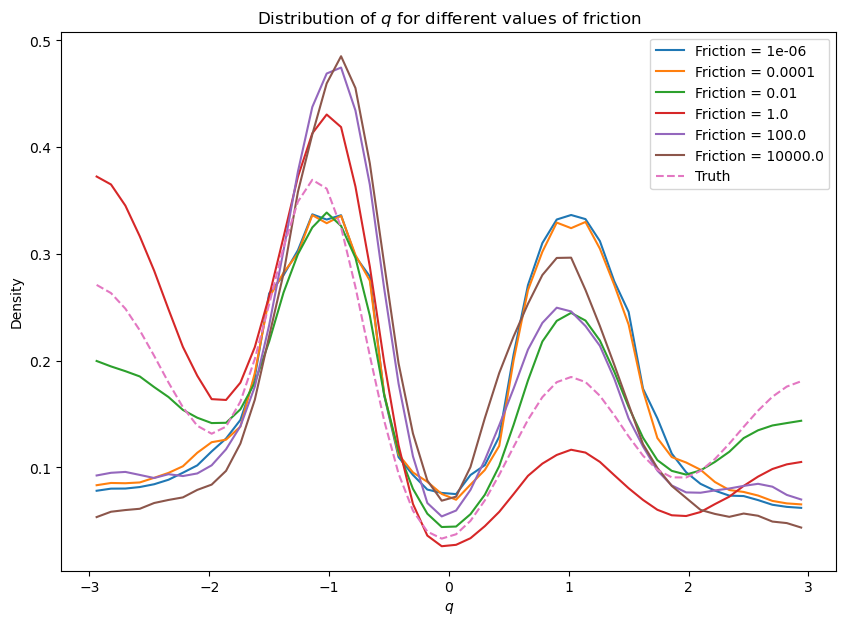

In [4]:
start_time =time.time()
OBABO_4.friction_graph(20000, 0.01, 100, gammas,q_init = np.random.normal(size =1000), p_init =np.random.normal(size = 1000) )
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [ ]:
start_time =time.time()
OBABO_4.friction_graph(100000, 0.01, 100, big_logs,q_init = np.random.normal(size =1000), p_init =np.random.normal(size = 1000) )
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

Time Elapsed: 102.05024409294128


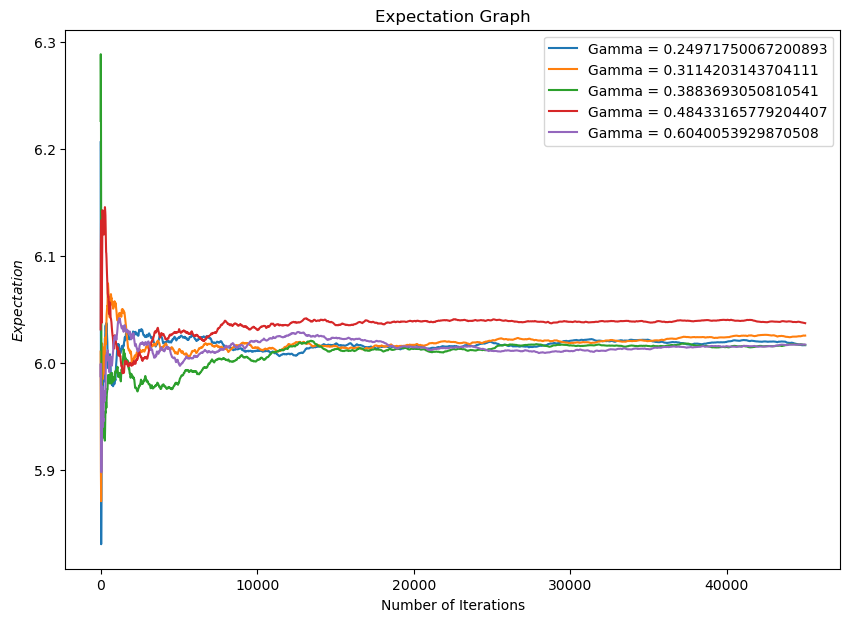

In [5]:
start_time =time.time()
OBABO_4.expectation_graph(jf.square,50000, 0.1,1000, big_logs[25:30],q_init = np.random.normal(size =1000), p_init =np.random.normal(size = 1000))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [6]:
big_logs = np.logspace(-3,1.699, 50)[20:40]

In [1]:
true_x_val = -0.47298443947

In [2]:
potential_val = -1.58376/7.731

In [5]:
true_val = 46.48/7.731
#true_val = 5.55571223
print(true_val)

6.0121588410296205


In [3]:
start_time =time.time()
OBABO_4.avg_convergence_time_graph("Number of steps to reach convergence for OBABO3",0.15, jf.square, potential_val, 0.01, big_logs[10:40],q_init = np.random.normal(size =1000), p_init =np.random.normal(size = 1000))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

NameError: name 'time' is not defined

Gamma = 0.027445388815281958
Iters = 260000
Gamma = 0.03422688273698281
Iters = 260000
Gamma = 0.042684019154389845
Iters = 260000
Gamma = 0.05323083335321371
Iters = 260000
Gamma = 0.06638366479099932
Iters = 260000
Gamma = 0.08278643548265453
Iters = 221125
Gamma = 0.10324217443404794
Iters = 260000
Gamma = 0.12875233146260612
Iters = 195431
Gamma = 0.1605658050881757
Iters = 205949
Gamma = 0.2002400847483044
Iters = 164651
Gamma = 0.24971750067200893
Iters = 171179
Gamma = 0.3114203143704111
Iters = 154146
Gamma = 0.3883693050810541
Iters = 141391
Gamma = 0.48433165779204407
Iters = 134205
Gamma = 0.6040053929870508
Iters = 127410
Gamma = 0.753249367222004
Iters = 133390
Gamma = 0.9393701046515556
Iters = 155907
Gamma = 1.171479501891172
Iters = 155432
Gamma = 1.4609409183404287
Iters = 188308
Gamma = 1.8219254911723193
Iters = 234008
Gamma = 2.272105910452707
Iters = 260000
Gamma = 2.83352161947761
Iters = 260000
Gamma = 3.5336577978652834
Iters = 260000
Gamma = 4.406790951083763
I

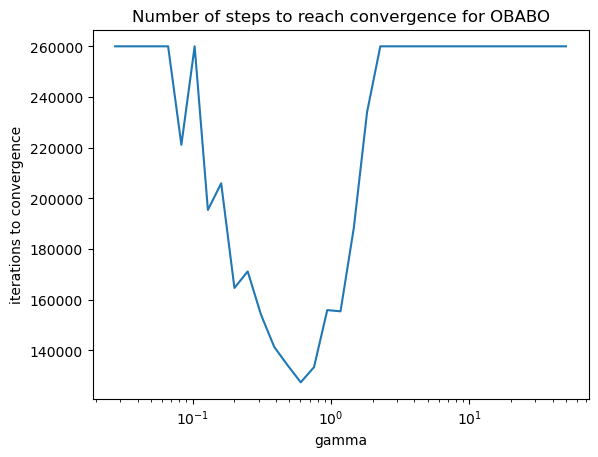

In [6]:
start_time =time.time()
OBABO_4.avg_convergence_time_graph("Number of steps to reach convergence for OBABO",1/4, jf.square, true_val, 0.01, big_logs[15:],q_init = np.random.normal(size =100), p_init =np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

Gamma = 0.027445388815281958
Iters = 260000
Gamma = 0.03422688273698281
Iters = 260000
Gamma = 0.042684019154389845
Iters = 260000
Gamma = 0.05323083335321371
Iters = 260000
Gamma = 0.06638366479099932
Iters = 260000
Gamma = 0.08278643548265453
Iters = 220540
Gamma = 0.10324217443404794
Iters = 260000
Gamma = 0.12875233146260612
Iters = 182296
Gamma = 0.1605658050881757
Iters = 173194
Gamma = 0.2002400847483044
Iters = 162309
Gamma = 0.24971750067200893
Iters = 174921
Gamma = 0.3114203143704111
Iters = 113262
Gamma = 0.3883693050810541
Iters = 160034
Gamma = 0.48433165779204407
Iters = 171275
Gamma = 0.6040053929870508
Iters = 148474
Gamma = 0.753249367222004
Iters = 157448
Gamma = 0.9393701046515556
Iters = 161650
Gamma = 1.171479501891172
Iters = 158167
Gamma = 1.4609409183404287
Iters = 204925
Gamma = 1.8219254911723193
Iters = 194425
Gamma = 2.272105910452707
Iters = 185102
Gamma = 2.83352161947761
Iters = 260000
Gamma = 3.5336577978652834
Iters = 260000
Gamma = 4.406790951083763
I

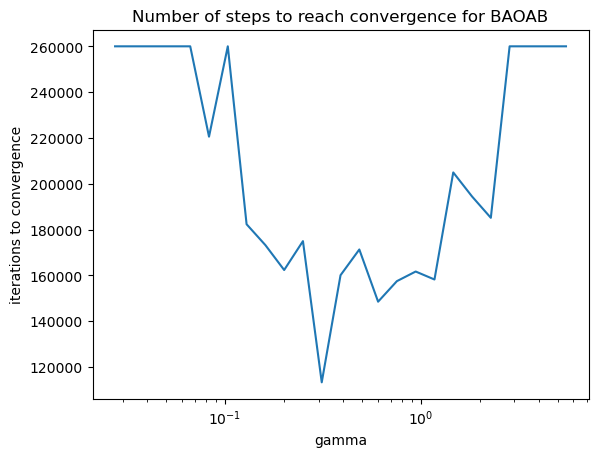

In [9]:
start_time =time.time()
BAOAB_4.avg_convergence_time_graph("Number of steps to reach convergence for BAOAB",1/4, jf.square, true_val, 0.01, big_logs[15:40],q_init = np.random.normal(size =100), p_init =np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

In [ ]:
@jit(nopython=True)
def potential_4(x):
    return -np.log( np.exp(-2*(x-1)**2) + 2*np.exp(-3*(x+1.1)**2) + 1.5*np.exp(-2*(x+3)**2) + np.exp(-2*(x-3)**2) )

@jit(nopython=True)
def force_4(x):
    r = -4*(x-1)*np.exp(-2*(x-1)**2)  -2*4*(x+1)*np.exp(-3*(x+1)**2)  -1.5*4*(x+3)*np.exp(-2*(x+3)**2) -4*(x-3)*np.exp(-2*(x-3)**2)
    F = r/(np.exp(-2*(x-1)**2) + 2*np.exp(-3*(x+1.1)**2) + 1.5*np.exp(-2*(x+3)**2) + np.exp(-2*(x-3)**2))
    return F

baoab_step_4 = jf.make_baoab(force_4)
baoab_4 = jf.Scheme(baoab_step_4, force_4, potential_4)

start_time =time.time()
baoab_4.avg_convergence_time_graph("Number of steps to reach convergence for OBABO",1/3, jf.square, true_val, 0.01, big_logs[10:40],q_init = np.random.normal(size =100), p_init =np.random.normal(size = 100))
end_time = time.time()
print(f"Time Elapsed: {end_time-start_time}")

Gamma = 0.001
Iters = 1000000
Gamma = 0.0012470904663564033


In [4]:
# defining functions for potential and force
@njit(parallel=True)
def U(x):
    return - x**2/2 + x**4/4

@njit(parallel=True)
def force(q):
    F = q - q**3
    return F

baoab_step = jf.make_baoab(force)
BAOAB = jf.Scheme(baoab_step, force, U)

In [10]:
baoab_2_its = np.load('iterations_bimodal_baoab.npy')
print(baoab_2_its)

[260000 260000 260000 260000 260000 260000 259999 211730 160480 148503
 135033 139425 123943 124674 104059 139588 120323 161835 165311 150862
 197793 260000 260000 260000 260000 260000 260000 260000 260000 260000
 260000 260000 260000 260000 260000]


In [15]:
obabo_4_its = np.load('iterations_4_mode_obabo.npy')


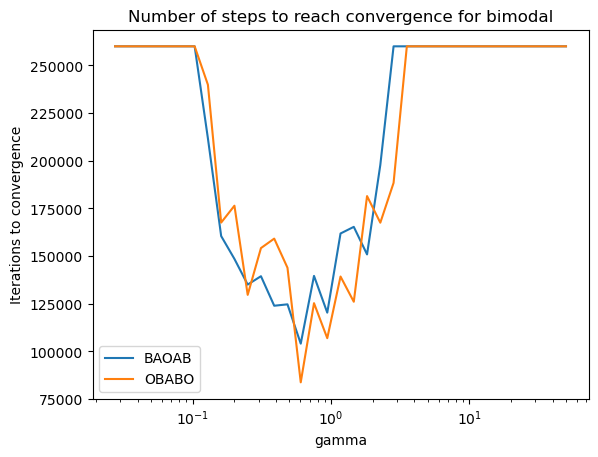

In [23]:
baoab_4_its = np.load('iterations_4_mode_baoab.npy')
# Making the first graph
plt.plot(big_logs[15:], baoab_2_its, label = 'BAOAB')
plt.plot(big_logs[15:], obabo_2_its, label = 'OBABO')
plt.xlabel('gamma')
plt.ylabel('Iterations to convergence')
plt.xscale('log')
plt.legend()
plt.title('Number of steps to reach convergence for bimodal')
plt.savefig('Bimodal.pdf', bbox_inches = 'tight')

In [19]:
obabo_4_its = np.load('iterations_4_mode_obabo.npy')

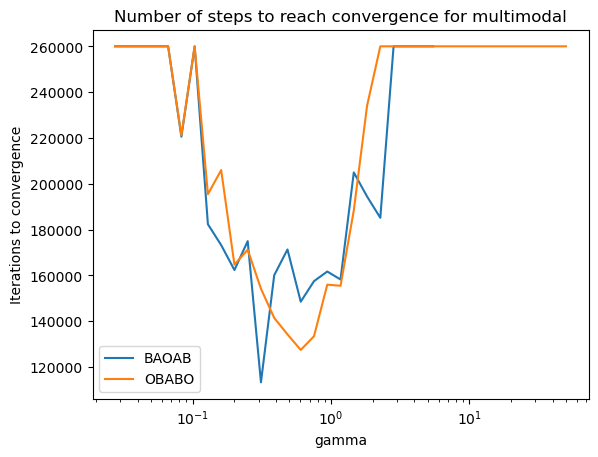

In [21]:
baoab_4_its = np.load('iterations_4_mode_baoab.npy')
# Making the first graph
plt.plot(big_logs[15:40], baoab_4_its, label = 'BAOAB')
plt.plot(big_logs[15:], obabo_4_its, label = 'OBABO')
plt.xlabel('gamma')
plt.ylabel('Iterations to convergence')
plt.xscale('log')
plt.legend()
plt.title('Number of steps to reach convergence for multimodal')
plt.savefig('Multimodal.pdf', bbox_inches = 'tight')